# 信号绘图

参考资料：

- [幅度谱、相位谱、能量谱等语音信号处理中的基础知识](https://blog.csdn.net/yyhaohaoxuexi/article/details/109467807)
- [深入解构magnitude_spectrum()](https://www.cnblogs.com/WindyZ/p/magnitude_spectrum.html)
- [信号处理基本参数](https://learnku.com/articles/45140)
- [梅尔谱,MFCC](https://www.cnblogs.com/liaohuiqiang/p/10159429.html)

![](https://img-blog.csdnimg.cn/20201103154002153.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3l5aGFvaGFveHVleGk=,size_16,color_FFFFFF,t_70#pic_center)

In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft YaHei'

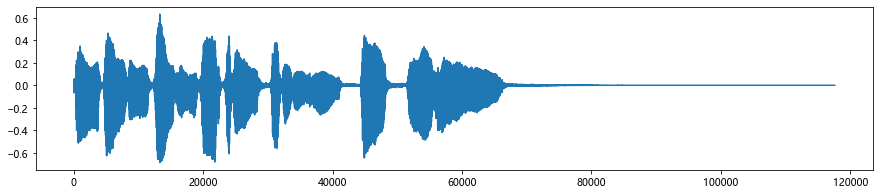

In [2]:
y, sr = librosa.load(librosa.ex('trumpet'))
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(y)
plt.show()

matplotlib有好几个关于信号的可视化绘图函数

主要就是探索这些绘图函数的参数，以及图像表达的意义

- [spectrum_demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/spectrum_demo.html#)
- [specgram_demo](https://matplotlib.org/stable/gallery/images_contours_and_fields/specgram_demo.html#sphx-glr-gallery-images-contours-and-fields-specgram-demo-py)
- [psd_demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/psd_demo.html#sphx-glr-gallery-lines-bars-and-markers-psd-demo-py)

spectrogram -> 频谱图

上图就是一个信号，首先取这个信号的一部分，观察一下

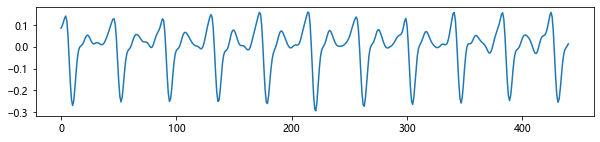

In [3]:
s = y[10000: 10000 + int(sr * 0.02)]
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(s)
plt.show()

## 幅度谱

绘制该信号的**幅度谱图**(magnitude spectrum)


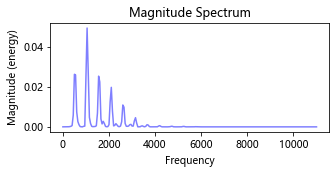

In [4]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_title("Magnitude Spectrum")
a = ax.magnitude_spectrum(s, Fs=sr, color='b', alpha=.5)
plt.show()

现在我想知道的是：
- 1.这个图的含义
- 2.绘制这个图的函数的参数哪些比较关键？
- 3.相关数据是怎么计算出来的?计算出来后，使用 `ax.plot()`自己画一个类似的图

### 幅度谱的含义

1.含义：这一段信号由很多种不同频率的波形叠加而成，可以看到，在2000频率左右可以到有一个个小波峰。

### 绘图函数重要的参数

[matplotlib.axes.Axes.magnitude_spectrum](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.magnitude_spectrum.html?highlight=magnitude_spectrum#matplotlib.axes.Axes.magnitude_spectrum)

```python
Axes.magnitude_spectrum(
    x, Fs=None, window=None, scale=None                
)

```

这里就列三个我认为比较重要的参数，其他参数可参考官方文档：

- `Fs`: 采样率，这个得填对了
- `scale`: 控制纵轴表现形式, 默认就是线性，可以用分贝`scale='dB'`的形式
- `window`: 加窗函数，默认汉宁窗

绝大多数情况下填上信号，填对采样率`Fs`就完事了，可以调下`scale`观察不同尺度下的幅度谱情况。

> 个人认为，这个图是用来绘制分帧后，每一帧的幅度谱。
>
> 所以这里有加窗的选项，因为分帧后才要加窗

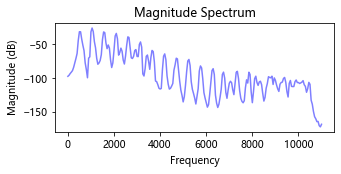

In [5]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_title("Magnitude Spectrum")
ax.magnitude_spectrum(s, Fs=sr, scale='dB', color='b', alpha=.5)
plt.show()

### 如何亲自计算

https://www.cnblogs.com/WindyZ/p/magnitude_spectrum.html

首先我们有原始信号`s`和该信号的采样率`sr`，要通过一系列运算计算频率与赋值的关系。

还有加窗

In [6]:
import scipy

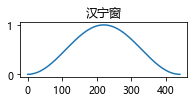

In [7]:
window = scipy.signal.hann(len(s))
fig, ax = plt.subplots(figsize=(3, 1))
ax.plot(window)
ax.set_title('汉宁窗')
plt.show()

In [8]:
def get_magnitude_freqs(y, sr, win_func):
    n = len(y)  # 信号长度
    window = win_func(n)  # 加窗
    
    spectrum = np.fft.fft(y * window)
    freqs = np.fft.fftfreq(n, 1 / sr)
    center = n // 2 + 1  # 只需要取一半来绘图
    spectrum = np.abs(spectrum) / np.abs(window).sum()  # 归一化
    return spectrum[:center], freqs[:center]
    

In [9]:
spectrum, freqs = get_magnitude_freqs(s, sr, scipy.signal.hann)

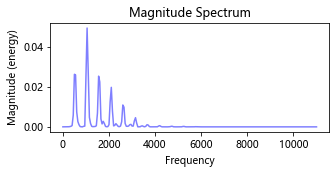

In [10]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_title("Magnitude Spectrum")
ax.plot(freqs, spectrum, color='b', alpha=.5)
ax.set_ylabel("Magnitude (energy)")
ax.set_xlabel("Frequency")
plt.show()

可以说是一模一样了！

如果要显示dB幅度谱，就手动计算一下即可

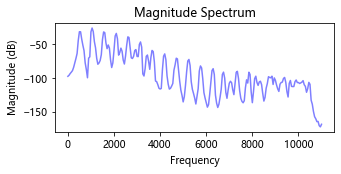

In [11]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_title("Magnitude Spectrum")
ax.plot(freqs, np.log10(spectrum) * 20, color='b', alpha=.5)
ax.set_ylabel("Magnitude (dB)")
ax.set_xlabel("Frequency")
plt.show()

## 相位谱

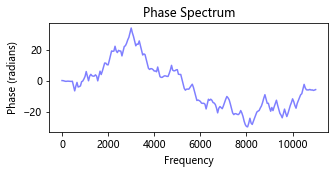

In [12]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_title("Phase Spectrum")
a = ax.phase_spectrum(s, Fs=sr, color='b', alpha=.5)
plt.show()

## 角谱

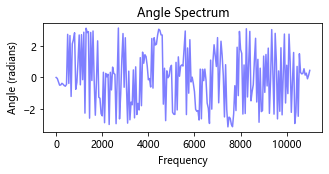

In [13]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_title("Angle Spectrum")
a = ax.angle_spectrum(s, Fs=sr, color='b', alpha=.5)
plt.show()

## 语谱图

[python做语音信号处理](https://www.cnblogs.com/LXP-Never/p/10078200.html#blogTitle10)

绝大部分信号都可以分解为若干不同频率的正弦波。
这些正弦波中，频率最低的称为信号的基波，其余称为信号的谐波。
基波只有一个，可以称为一次谐波，谐波可以有很多个，每次谐波的频率是基波频率的整数倍。谐波的大小可能互不相同。
以谐波的频率为横坐标，幅值（大小）为纵坐标，绘制的系列条形图，称为频谱。频谱能够准确反映信号的内部构造。

　　语谱图综合了时域和频域的特点，明显的显示出来了语音频率随时间的变化情况，语谱图的横轴为时间，纵轴为频率任意给定频率成分在给定时刻的强弱用颜色深浅表示。颜色深表示频谱值大，颜色浅表示频谱值小，语谱图上不同的黑白程度形成不同的纹路，称为声纹，不用讲话者的声纹是不一样的，可以用做声纹识别。

其实得到了分帧信号，频域变换取幅值，就可以得到语谱图，如果仅仅是观察，matplotlib.pyplot有specgram指令：

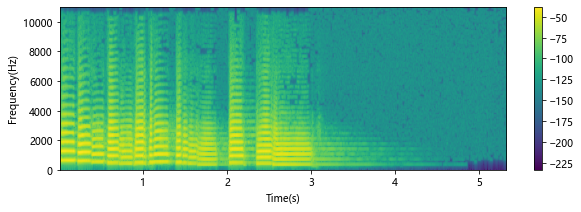

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
Pxx, freqs, bins, im = ax.specgram(y, Fs=sr)
plt.colorbar(im, ax=ax)
plt.ylabel('Frequency(Hz)')
plt.xlabel('Time(s)')
plt.show()

想知道：
- 这个图的意义
- 绘图函数参数意义
- 如何亲自计算

可以计算出原始信号的长度，以及横轴`bins`的长度

In [15]:
len(y), len(bins)

(117601, 917)

实际上语谱图就是划窗以后，对每个窗口进行FFT，然后得到频率和幅值，最后再堆叠到一起。

这个函数默认的帧长是`NFFT=256`，重叠部分长为`noverlap=128`

可以理解为帧移`step=128`，计算得到的滑动窗口数量为

In [16]:
NFFT = 256
noverlap = 128
step = NFFT - noverlap

num_of_windows = max(1, (len(y) - NFFT) // step) + 1
print('滑动窗口数量:', num_of_windows)

滑动窗口数量: 917


## 梅尔谱与MFCC
梅尔频谱特征：Mel Bank Features

梅尔频率倒谱系数：Mel Frequency Cepstrum Coefficient, MFCC

[Text(0.5, 1.0, 'MFCC')]

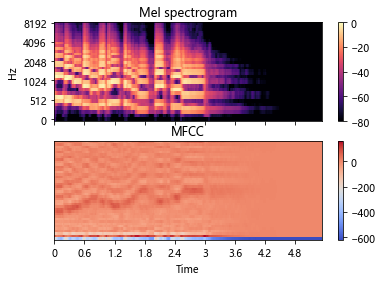

In [102]:
import matplotlib.pyplot as plt
import librosa.display
D = np.abs(librosa.stft(y))**2
# S = librosa.feature.melspectrogram(S=D, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=32, fmax=8000)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])

fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()

img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

|使用matplotlib自己画图

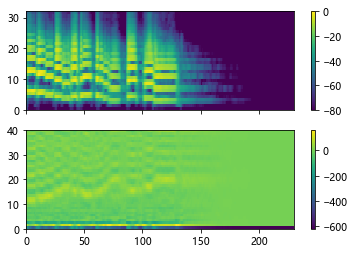

In [75]:
y1 = librosa.power_to_db(S, ref=np.max)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(6, 4))
im = ax[0].pcolormesh(y1)
fig.colorbar(im, ax=ax[0])

im = ax[1].pcolormesh(mfccs)
fig.colorbar(im, ax=ax[1])

plt.show()

## 全通道赋值热力图

In [172]:
df1 = pd.read_csv("2022-0310-1549_demo.csv", header=None)
df2 = pd.read_csv("2022-0310-1550_demo.csv", header=None)
df = pd.concat([df1, df2]).reset_index(drop=True)
df = df.iloc[:, 1:]
columns = [
224, 225, 226, 227, 230, 231, 232, 233, 234, 235, 240, 241, 242,
243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
334, 335, 336, 337, 338, 354, 355, 356, 357, 358, 359, 360, 361,
362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
375, 376, 377, 378]
df.columns = columns
df = df.astype('int16')
# df /= 2500  # 放缩

In [176]:
def rolling(s, frame_length=500, frame_step=100):
    res = []
    for i in range(0, len(s) - frame_length + frame_step, frame_step):
        tmp = s.iloc[i: i + frame_length]
        tmp = tmp.abs().mean()
        res.append(tmp)
    return res

In [179]:
from tqdm import tqdm

In [180]:
res = []
for c in tqdm(df.columns):
    res.append(rolling(df[c], frame_length=500, frame_step=100))

100%|████████████████████████████████████████████████████████████████████████████████| 134/134 [00:37<00:00,  3.60it/s]


In [182]:
df2 = pd.DataFrame(res)

In [212]:
np.quantile(df2.values.ravel(), .65)

61.018

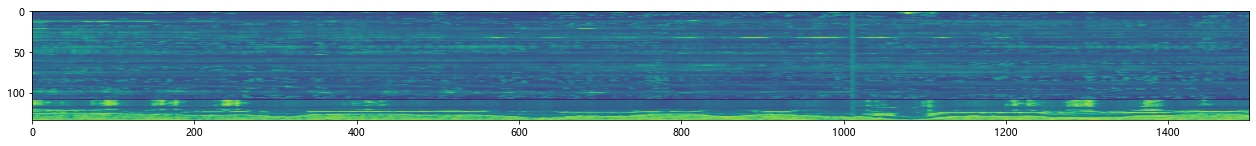

In [231]:
fig, ax = plt.subplots(figsize=(32, 2))
im= ax.imshow(np.log(df2.values[:, :1500]))
# plt.colorbar(im, ax=ax)

In [246]:
len(x)

600

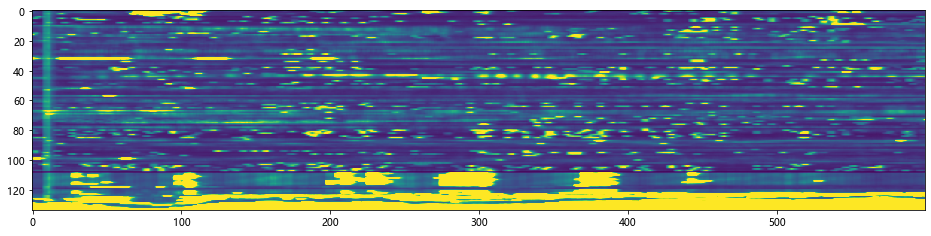

In [258]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.imshow(df2.values[:, 1000:1600], vmin=0, vmax=80)
# x = np.arange(0, 501, 100)
# ax.set_xticks(x)
# ax.set_xticklabels(xlabel)
plt.show()

In [270]:
def sec_to_n_frame(sec, sr, length, step):
    return max(0, (sec * sr - length) // step) + 1
sec_to_n_frame(8, sr=2500, length=500, step=100)